# Homework Assignment 5 - Chem 277B
## Rosenbrock Function Optimization

### 1) Objective

Optimization methods such as **Gradient Descent** play a crucial role when training ANNs and are important for many other machine learning tools. In this assignment, we want you to get an idea of how different flavours of two main optimization algorithms, **Gradient Descent** and **Simulated Annealing**, work. For that purpose, find the minimum of the Rosenbrock function using gradient-free and gradient-based optimization methods and visualize the process.

### 2) Preparation

Before starting, import the necessary libraries for optimization and visualization.

In [138]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

sp.init_printing(use_latex=True)
from IPython.display import display, Markdown

Define the Rosenbrock function 

$$f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$$

Visualize the function with `plt.contourf` or `go.Surface` to understand its landscape within $-2 \leq x_1 \leq 2$ and $-1 \leq x_2 \leq 3$. Where is the global minimum? Mark it on the plot.

Gradiant:


minimum at: {x1: 1, x2: 1}
value at minimum: 0


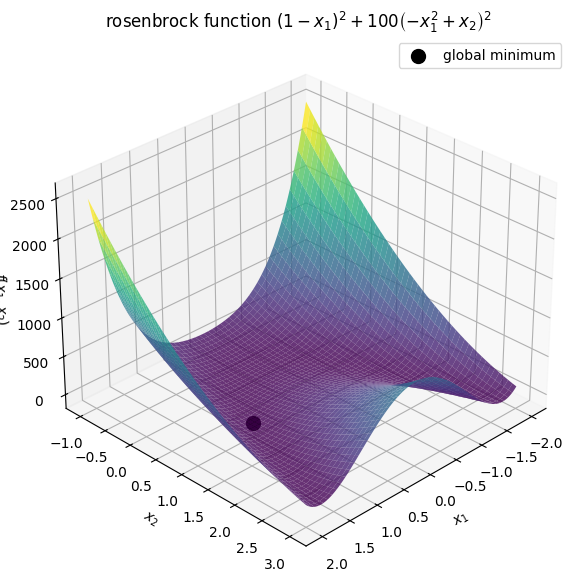

In [146]:
# define symbolic variables
x1, x2 = sp.symbols('x1 x2')

# define this rosenbrock function symbolically
f_expr = 100 * (x2 - x1**2)**2 + (1 - x1)**2

# compute the gradient
grad = [sp.diff(f_expr, var) for var in (x1, x2)]
#display(f'grad: {sp.latex(grad)}')
print("Gradiant:")
display(grad)

# solve for critical points
critical_points = sp.solve(grad, (x1, x2), dict=True)
minimum_point = critical_points[0]
minimum_value = f_expr.subs(minimum_point)
print("minimum at:", minimum_point)
print("value at minimum:", minimum_value)

# create a grid for numerical evaluation
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# lambdify symbolic expression to numerical function
f_num = sp.lambdify((x1, x2), f_expr, modules='numpy')
Z = f_num(X, Y)

# create our 3d plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# mark the global minimum
min_x = float(minimum_point[x1])
min_y = float(minimum_point[x2])
min_z = float(minimum_value)
ax.scatter(min_x, min_y, min_z, color='black', s=100, label='global minimum')

# rotate our view
ax.view_init(elev=30, azim=45)

# add labels and title
ax.set_title(rf'rosenbrock function ${sp.latex(f_expr)}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.legend()
plt.show()


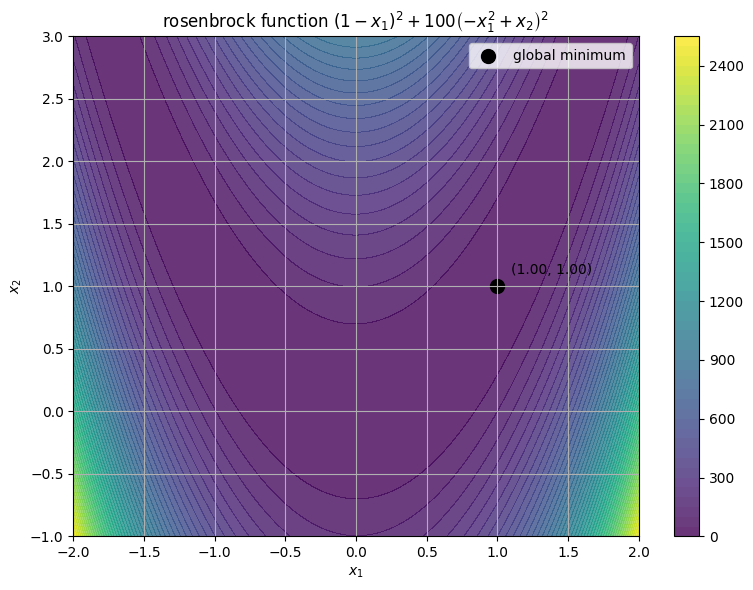

In [23]:
# plot contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour)

# mark global minimum
plt.scatter(min_x, min_y, color='black', s=100, label='global minimum')
plt.text(min_x + 0.1, min_y + 0.1, f'({min_x:.2f}, {min_y:.2f})', color='black')

# title and labels
plt.title(rf'rosenbrock function ${sp.latex(f_expr)}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Derive the gradient of the Rosenbrock function. Visualize the (negative) gradient field using `plt.quiver` or `go.Cone`.

minimum at: {x1: 1, x2: 1}
value at minimum: 0


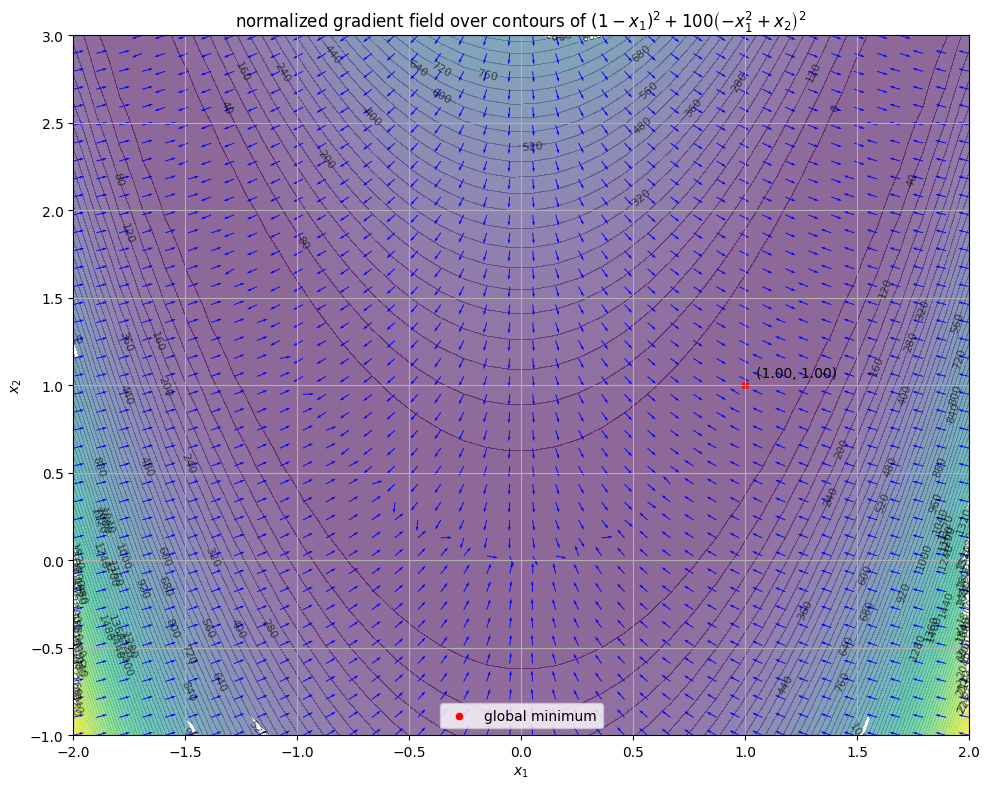

In [128]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# define symbolic variables
x1, x2 = sp.symbols('x1 x2')

# define the rosenbrock function symbolically
f_expr = 100 * (x2 - x1**2)**2 + (1 - x1)**2

# compute the gradient
grad = [sp.diff(f_expr, var) for var in (x1, x2)]

# solve for critical points
critical_points = sp.solve(grad, (x1, x2), dict=True)
minimum_point = critical_points[0]
minimum_value = f_expr.subs(minimum_point)
print("minimum at:", minimum_point)
print("value at minimum:", minimum_value)

# lambdify function and gradient components
f_num = sp.lambdify((x1, x2), f_expr, modules='numpy')
grad_num = [sp.lambdify((x1, x2), g, modules='numpy') for g in grad]

'''
# create a coarse grid focused near the global minimum
res = 20
tol = 0.0001
x_vals = np.linspace(1 - tol, 1 + tol, res)
y_vals = np.linspace(1 - tol, 1 + tol, res)
X, Y = np.meshgrid(x_vals, y_vals)
'''
# or not
res = 40
tol = 1
x_vals = np.linspace(-2, 2, res)
y_vals = np.linspace(-1, 3, res)
X, Y = np.meshgrid(x_vals, y_vals)

# evaluate function and gradient field
Z = f_num(X, Y)
U_raw = -grad_num[0](X, Y)
V_raw = -grad_num[1](X, Y)

# normalize vectors for consistent arrow length
magnitude = np.sqrt(U_raw**2 + V_raw**2)
magnitude[magnitude == 0] = 1e-8  # avoid division by zero
U = U_raw / magnitude
V = V_raw / magnitude

# plot contour and gradient field
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=80,  alpha=0.6)  # cmap='viridis',linewidths=1,
plt.clabel(contour, inline=True, fontsize=8, colors='black') # contour labels
plt.quiver(X, Y, U, V, color='blue', scale=80, width=0.001)

# mark the global minimum
min_x = float(minimum_point[x1])
min_y = float(minimum_point[x2])
plt.scatter(min_x, min_y, color='red', s=20, label='global minimum')
plt.text(min_x + tol/20, min_y + tol/20, f'({min_x:.2f}, {min_y:.2f})', color='black')

# add labels and title
plt.title(rf'normalized gradient field over contours of ${sp.latex(f_expr)}$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3) Simulated Annealing

Suppose you only have access to the function value but not its gradient, simulated annealing is perhaps the most straightforward optimization method to implement. Therefore, as a warm-up exercise, implement the simulated annealing algorithm to find the minimum of the Rosenbrock function.

The algorithm works as follows:
1. Start from an initial point (e.g., (-1, 2)).
2. Generate a new candidate point by adding a small random perturbation to the current point.
3. Decide whether to accept the new point based on the Metropolis criterion:
$$P_\text{move} = \begin{cases} 1 & \text{if } \Delta E < 0 \\ e^{-\Delta E / T} & \text{if } \Delta E \geq 0 \end{cases}$$
4. Start with a high temperature $T$ (e.g., 1.0)
5. Optional Gradually cool down (e.g., by multiplying $T$ by 0.9).
6. Repeat steps 2-5 for a sufficient number of iterations (e.g., 1000).

Plot the trajectory of points visited during the optimization on top of the contour plot of the Rosenbrock function. Also plot the function value versus iteration number to show convergence.

Discuss the results. How close did you get to the global minimum? How does the choice of temperature affect the optimization? How does the cooling affect the results?

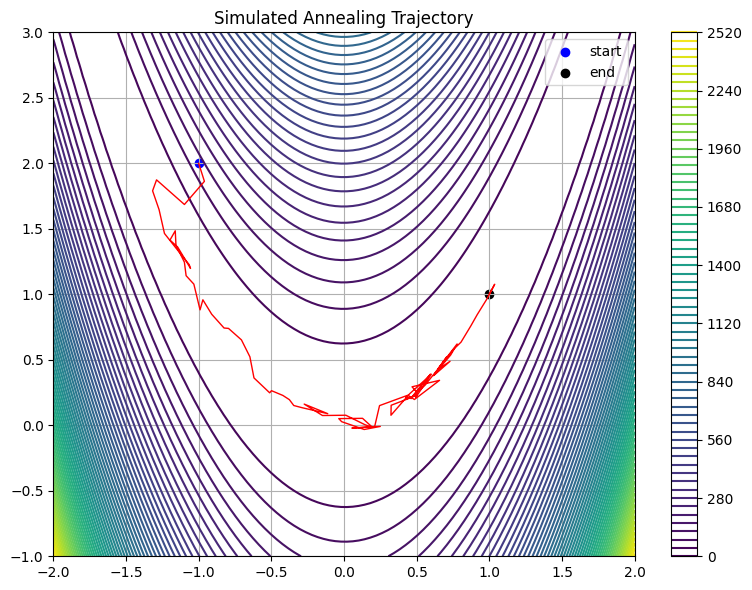

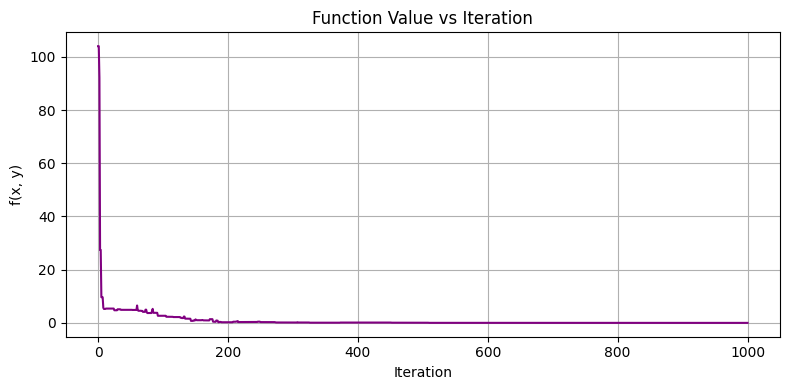

In [341]:
def sim_annealing(func, x_0=-1, y_0=2, x_min=-2, x_max=2, y_min=-1, y_max=3, T=1.0, N = 1000, cooling_factor = 0.9):
    #epsilon = np.sqrt((x_max - x_min)**2 + (y_max - y_min)**2) / 30.0 # some fraction of the diagonal domain
    epsilon = (x_max - x_min + y_max - y_min) / 40.0
    iterations = N
    x, y = x_0, y_0
    path = [(x, y)]
    energy = [func(x, y)]
    
    np.random.seed(42)
    for i in range(iterations):
        x_p = np.random.uniform(-epsilon, +epsilon) 
        y_p = np.random.uniform(-epsilon, +epsilon) 

        x_new = x + x_p
        y_new = y + y_p
        E_new = func(x_new, y_new)
        dE = E_new - energy[-1]
        
        if dE < 0 or np.random.rand() < np.exp(-dE / (T + 1e-8)):
            x, y = x_new, y_new
            energy.append(E_new)
            path.append((x, y))
            
        else:
            energy.append(energy[-1])
            path.append((x, y))
        
        T *= cooling_factor
            

    return np.array(path), np.array(energy)

def show_path(func, path, x_min=-2.0, x_max=2.0, y_min=-1.0, y_max=3.0, n=100):
    a = np.linspace(x_min, x_max, n)
    b = np.linspace(y_min, y_max, n)
    x, y = np.meshgrid(a, b)
    z = func(x, y)

    fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contour(x, y, z, levels=80, cmap='viridis')
    plt.colorbar(contour)
    ax.plot(path[:, 0], path[:, 1], color='red', linewidth=1)
    ax.scatter(path[0, 0], path[0, 1], color='blue', label='start')
    ax.scatter(path[-1, 0], path[-1, 1], color='black', label='end')
    ax.legend()
    ax.set_title("Simulated Annealing Trajectory")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def show_convergence(energy):
    plt.figure(figsize=(8, 4))
    plt.plot(energy, color='purple')
    plt.title("Function Value vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("f(x, y)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

f = sp.lambdify((x1, x2), f_expr, "math")
path, energy = sim_annealing(f, cooling_factor=.99, T = 1)
show_path(f, path)
show_convergence(energy)

In [340]:
p_true = np.array((min_x, min_y))
print(f"p_true: {p_true}")

p_anneal = np.array(path[-1])
print(f"p_anneal: {p_anneal}")

error_abs = np.abs(np.linalg.norm(p_true-p_anneal))
print(f"Absolute Error: {error_abs:2.4f}")

error_rel = error_abs / np.linalg.norm(p_true)
print(f"Relative Error: {error_rel:2.4f}")

p_true: [1. 1.]
p_anneal: [1.00064556 1.00133647]
Absolute Error: 0.0015
Relative Error: 0.0010


**Discuss the Results**

*How close did you get to the global minimum?*

We compared the distance between the true minimum \((1, 1)\) and the final point reached by simulated annealing. This yielded the following metrics:
```
Absolute Error: 0.0015
Relative Error: 0.0010
```
The absolute error reflects the Euclidean distance between the two points, while the relative error scales this distance by the norm of the true minimum.
Both values indicate that the algorithm converged very closely to the global minimum.

We had to tune our random step size.  We chose a step size proportional to the sum of the domain widths.  Further tuning or adaptive scaling strategies could improve convergence and robustness.

*How does the choice of temperature affect the optimization?*

The initial temperature \(T\) controls the randomness of the search:

- **High temperature** allows the algorithm to explore widely, accepting uphill moves and escaping local minima.
- **Low temperature** restricts movement, resulting in a more deterministic and smoother path toward the minimum.

Choosing a temperature that's too low can trap the algorithm early, while too high may delay convergence.

*How does the cooling affect the results?*

Cooling was implemented by multiplying the temperature by a **cooling factor** at each iteration:

- **Cooling factor > 1** simulates heating, propably not useful for optimization.
- **Cooling factor = 1** maintains a constant temperature, effectively random search.
- **Cooling factor < 1** simulates cooling, the standard approach.

Slower cooling (e.g., factor close to 1 like 0.995) allows more exploration and smoother convergence. Faster cooling (e.g., 0.9) can cause premature freezing and suboptimal results.

### 4) Gradient Descent

If you have access to the gradient of the function, gradient descent is a more efficient optimization method, especially in high-dimensional spaces. This is also the basis for many advanced optimization algorithms. Let's implement the basic gradient descent algorithm to find the minimum of the Rosenbrock function.

The algorithm works as follows:
1. Start from an initial point (e.g., (1.5, 2.5)).
2. Update the current point using the gradient $g$ with a fixed learning rate $\eta$ (e.g., 0.001):
$$x \leftarrow x - \eta \, g(x)$$
3. Repeat step 2 for a sufficient number of iterations (e.g., 1000).

Plot the trajectory of points visited during the optimization on top of the contour plot of the Rosenbrock function. Also plot the function value versus iteration number to show convergence.

Discuss the results. How close did you get to the global minimum? How does the choice of learning rate affect the optimization?

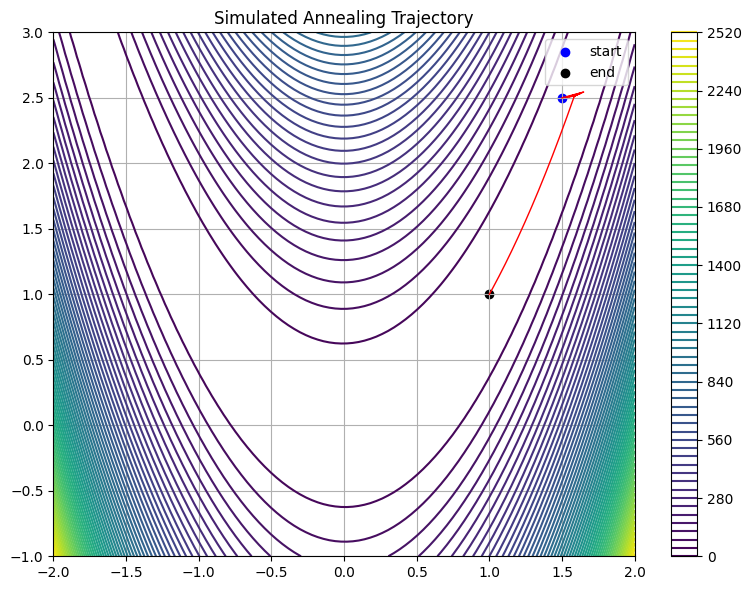

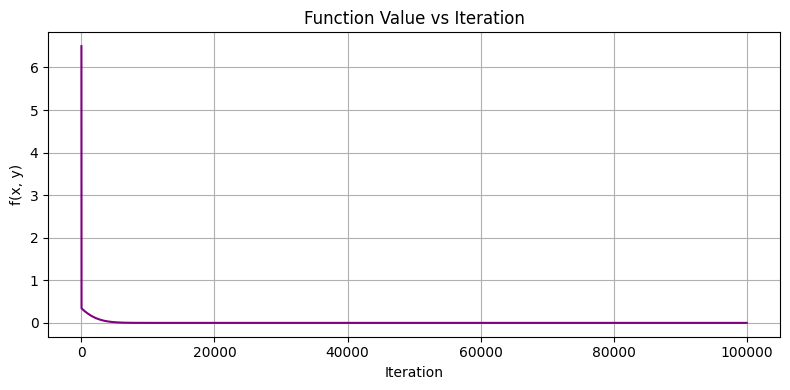

Final position: [1. 1.]


In [362]:
def basic_gradient_descent(func, dfdx, dfdy, x_0=1.5, y_0=2.5, x_min=-2, x_max=2, y_min=-1, y_max=3, N=100000, learning_rate=0.001):
    x, y = x_0, y_0
    path = [(x, y)]
    energy = [func(x, y)]

    for _ in range(N):
        # gradient descent update
        x -= learning_rate * dfdx(x, y)
        y -= learning_rate * dfdy(x, y)

        E = func(x, y)
        path.append((x, y))
        energy.append(E)

    return np.array(path), np.array(energy)

f = sp.lambdify((x1, x2), f_expr, "math")
grad = [sp.diff(f_expr, var) for var in (x1, x2)]
dfdx = sp.lambdify((x1, x2), grad[0], "math")
dfdy = sp.lambdify((x1, x2), grad[1], "math")

path, energy = basic_gradient_descent(f, dfdx, dfdy, x_0=1.5, y_0=2.5, learning_rate=0.001)
show_path(f, path)
show_convergence(energy)
print(f"Final position: {path[-1]}")

### 5) Momentum Method

You may find that the basic gradient descent method converges slowly. In practice, more advanced variants of gradient descent are often used, such as momentum. The momentum method updates the current point as follows:
1. Initialize the velocity $v$ to 0.
2. Update the velocity with a momentum factor $\mu$ (e.g., 0.9) and the gradient $g$:
$$v \leftarrow \mu v + g(x)$$
3. Update the current point using the velocity $v$ and learning rate $\eta$:
$$x \leftarrow x - \eta v$$
4. Repeat steps 2-3 for a sufficient number of iterations (e.g., 1000).
Implement the momentum method and compare its performance with the basic gradient descent method. Plot the trajectories and function values for both methods on the same plots for comparison.

Discuss the results. How does the momentum method improve convergence? How do the hyperparameters affect the results?

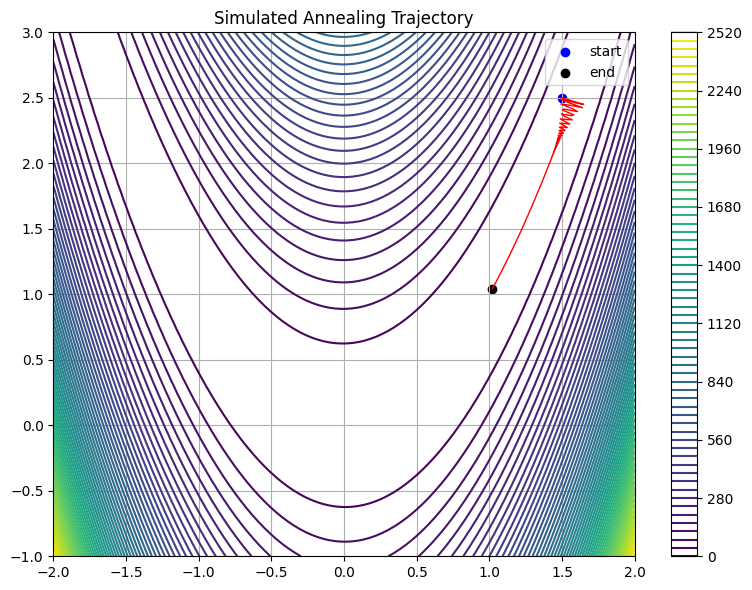

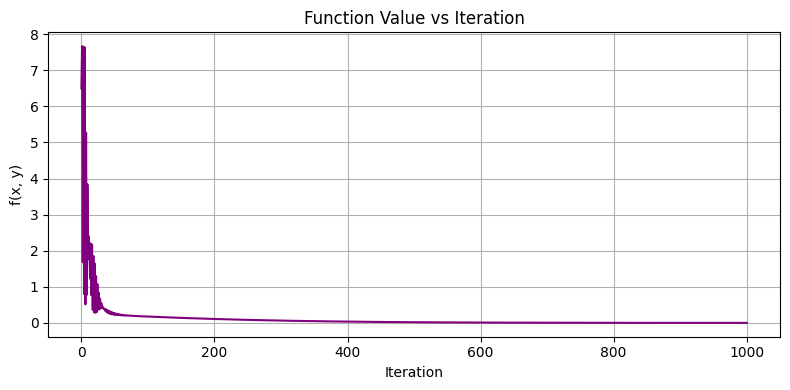

Final position: [1.02092249 1.04236539]


In [363]:
def gradient_descent_with_momentum(func, dfdx, dfdy, x_0=-1, y_0=2, N=1000, learning_rate=0.001, momentum=0.9):
    x, y = x_0, y_0
    vx, vy = 0.0, 0.0
    path = [(x, y)]
    energy = [func(x, y)]

    for _ in range(N):
        # compute gradient
        gx = dfdx(x, y)
        gy = dfdy(x, y)

        # update velocity
        vx = momentum * vx + gx
        vy = momentum * vy + gy

        # update position
        x -= learning_rate * vx
        y -= learning_rate * vy

        path.append((x, y))
        energy.append(func(x, y))

    return np.array(path), np.array(energy)

f = sp.lambdify((x1, x2), f_expr, "math")
grad = [sp.diff(f_expr, var) for var in (x1, x2)]
dfdx = sp.lambdify((x1, x2), grad[0], "math")
dfdy = sp.lambdify((x1, x2), grad[1], "math")


path, energy = gradient_descent_with_momentum(f, dfdx, dfdy, x_0=1.5, y_0=2.5, learning_rate=0.001, momentum=0.9)
show_path(f, path)
show_convergence(energy)
print(f"Final position: {path[-1]}")

### 6) More Advanced Methods

Research (e.g. [Bishop](https://www.bishopbook.com/), chapter 7.2.3 - 7.3.3) and implement advanced optimization methods (e.g., RMSprop, Adam, etc.) to optimize the Rosenbrock function. Some of these methods may require different hyperparameters or configurations (e.g., higher learning rates, different forms of momentum terms). Compare its performance with the previous methods. Explain why (or why not) it performs better.

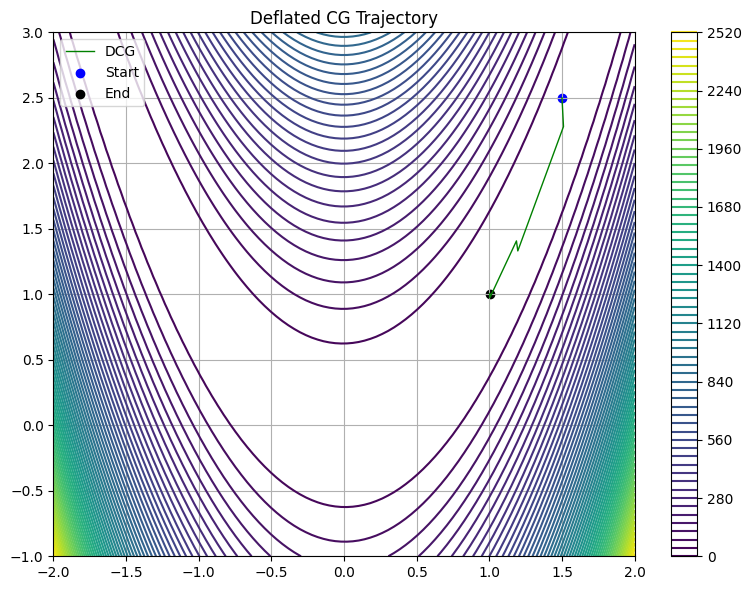

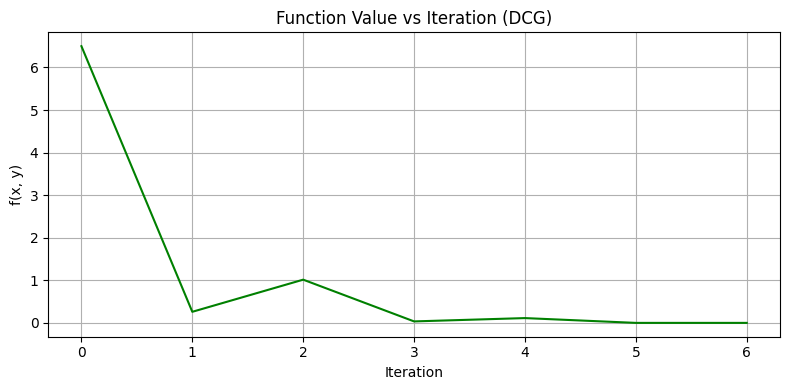

Final position: [1.00283685 1.00568157]


In [389]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def deflated_cg(H, b, Z=None, tol=1e-6, max_iter=100):
    n = len(b)
    x = np.zeros(n)
    r = b.copy()

    if Z is not None:
        HZ = H @ Z
        ZHZ = Z.T @ HZ
        P = np.eye(n) - HZ @ np.linalg.pinv(ZHZ) @ Z.T
        r = P @ r

    p = r.copy()
    rs_old = np.dot(r, r)

    for _ in range(max_iter):
        Hp = H @ p
        denom = np.dot(p, Hp)
        if denom == 0:
            break
        alpha = rs_old / denom
        x += alpha * p
        r -= alpha * Hp

        if np.linalg.norm(r) < tol:
            break

        rs_new = np.dot(r, r)
        p = r + (rs_new / rs_old) * p
        rs_old = rs_new

    return x

def optimize_dcg(f, grad_f, hess_f, x0, N=10, deflate=True):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    energy = [f(*x)]

    for _ in range(N):
        g = np.array(grad_f(*x))
        H = np.array(hess_f(*x))
        b = -g

        Z = None
        if deflate and len(path) > 5:
            Z = np.array([[1.0, 0.0], [0.0, 1.0]]).T  # fixed orthogonal basis

        p = deflated_cg(H, b, Z=Z)
        eta = min(1.0, 1.0 / (np.linalg.norm(p) + 1e-8))  # adaptive step
        x += eta * p

        path.append(x.copy())
        energy.append(f(*x))

    return np.array(path), np.array(energy)


x1, x2 = sp.symbols('x1 x2')
f_expr = 100 * (x2 - x1**2)**2 + (1 - x1)**2
grad_expr = [sp.diff(f_expr, var) for var in (x1, x2)]
hessian_expr = sp.hessian(f_expr, (x1, x2))

f_num = sp.lambdify((x1, x2), f_expr, "numpy")
grad_num = sp.lambdify((x1, x2), grad_expr, "numpy")
hessian_num = sp.lambdify((x1, x2), hessian_expr, "numpy")

x0 = [1.5, 2.5]
path, energy = optimize_dcg(f_num, grad_num, hessian_num, x0, N=6, deflate=True)
show_path(f_num, path)
show_convergence(energy)
print(f"Final position: {path[-1]}")


**Deflated Conjugate Gradient (DCG)**

DCG accelerates convergence of the Conjugate Gradient method by removing slow directions from the solution space... useful for ill-conditioned systems in optimization.

---

**Core Idea**

To solve $( H(x)p = -\nabla f(x) )$, DCG projects out components aligned with small eigenvalues using a deflation subspace $( Z )$. The projection matrix is:

$$
P = I - HZ(Z^T HZ)^{-1} Z^T
$$

The residual is deflated:  
$$
r_{\text{deflated}} = P r
$$
and CG proceeds using this modified residual.

---

**Optimization Update**

Each iteration solves for $( p)$ and updates:

$$
x_{k+1} = x_k + \eta_k p_k $$

with adaptive step size \( \eta_k \) or line search.

---

**Deflation Basis**

Common choices for $( Z )$ are:

- Previous gradients  
- Approximate eigenvectors  
- Fixed orthogonal directions  

---

**Impovements**
- Faster convergence for stiff problems  
- Reduces impact of small eigenvalues  
- Compatible with Newton-style updates  


# Resources

DCG:

 - https://www.jstage.jst.go.jp/article/jasse/8/1/8_154/_pdf/-char/en
 - https://arxiv.org/pdf/1209.1963

